In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dru-kaggle-intro/sample_submission.csv
/kaggle/input/dru-kaggle-intro/train_mobile.csv
/kaggle/input/dru-kaggle-intro/test_mobile.csv


In [2]:
train = pd.read_csv('/kaggle/input/dru-kaggle-intro/train_mobile.csv')
test = pd.read_csv('/kaggle/input/dru-kaggle-intro/test_mobile.csv')
train.head(15)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1023,yes,0.6,yes,0,yes,53,0.8,146,3,...,905,1988,2633,17,3.0,8,yes,yes,no,2
1,565,yes,0.6,yes,2,yes,41,1.0,155,5,...,1263,1716,2605,11,2.0,10,yes,yes,no,2
2,617,yes,2.6,no,0,no,10,0.9,141,6,...,1216,1786,2771,16,8.0,12,yes,no,no,2
3,1823,yes,1.3,no,13,yes,44,0.7,151,2,...,1208,1212,1413,8,2.0,16,yes,yes,no,1
4,1823,no,1.8,no,4,yes,10,0.9,149,8,...,381,1018,3222,13,8.0,19,yes,no,yes,3
5,1956,no,0.6,yes,0,no,24,0.9,197,4,...,512,1149,702,16,3.0,6,yes,yes,yes,0
6,1447,yes,0.6,no,0,no,53,0.8,184,7,...,386,836,1101,17,1.0,21,yes,no,no,0
7,511,yes,0.7,yes,2,yes,9,0.2,103,5,...,1137,1224,515,19,10.0,13,yes,no,no,0
8,771,yes,3.0,yes,0,no,9,0.2,192,5,...,248,874,3948,5,2.0,8,no,no,no,3
9,1522,yes,2.3,no,5,yes,33,0.6,187,8,...,151,1005,3828,14,9.0,14,yes,yes,yes,3


In [3]:
# print a summary of the train data
train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,1500.000000,1450.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1388.000000,1500.000000,1500.000000
mean,1238.160000,1.620621,4.324000,32.130000,0.601467,150.330000,4.568667,9.917333,642.916667,1255.106000,2123.830000,12.364667,5.734150,12.036667,1.500000
std,439.103833,0.816908,4.370937,18.077287,0.290150,35.456121,2.308716,6.074902,443.188796,433.117891,1091.421832,4.181787,4.307478,5.483615,1.127319
min,503.000000,0.600000,0.000000,2.000000,0.200000,90.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,3.000000,0.000000
25%,852.750000,0.800000,1.000000,16.000000,0.300000,119.000000,3.000000,5.000000,281.750000,880.500000,1186.750000,9.000000,2.000000,7.000000,0.000000
50%,1221.000000,1.600000,3.000000,32.000000,0.600000,150.000000,5.000000,10.000000,561.500000,1250.500000,2135.500000,12.000000,5.000000,12.000000,1.000000
75%,1608.250000,2.300000,7.000000,48.000000,0.900000,181.000000,7.000000,15.000000,938.000000,1642.250000,3079.250000,16.000000,9.000000,17.000000,3.000000
max,1998.000000,3.100000,19.000000,64.000000,1.100000,210.000000,8.000000,20.000000,1960.000000,1998.000000,4000.000000,19.000000,18.000000,21.000000,3.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1500 non-null   int64  
 1   blue           1500 non-null   object 
 2   clock_speed    1450 non-null   float64
 3   dual_sim       1460 non-null   object 
 4   fc             1500 non-null   int64  
 5   four_g         1455 non-null   object 
 6   int_memory     1500 non-null   int64  
 7   m_dep          1500 non-null   float64
 8   mobile_wt      1500 non-null   int64  
 9   n_cores        1500 non-null   int64  
 10  pc             1500 non-null   int64  
 11  px_height      1500 non-null   int64  
 12  px_width       1500 non-null   int64  
 13  ram            1500 non-null   int64  
 14  sc_h           1500 non-null   int64  
 15  sc_w           1388 non-null   float64
 16  talk_time      1500 non-null   int64  
 17  three_g        1500 non-null   object 
 18  touch_sc

In [5]:
# create a list with categorical features
cat_features_list = train.select_dtypes(include='object').columns.to_list()
cat_features_list

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [6]:
columns_to_encode = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in columns_to_encode:
    
    # encode columns for both train and test sets
    train[f'{col}'] = train[f'{col}'].apply(lambda x: 1 if x == 'yes' else 0)
    test[f'{col}'] = test[f'{col}'].apply(lambda x: 1 if x == 'yes' else 0)
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1023,1,0.6,1,0,1,53,0.8,146,3,...,905,1988,2633,17,3.0,8,1,1,0,2
1,565,1,0.6,1,2,1,41,1.0,155,5,...,1263,1716,2605,11,2.0,10,1,1,0,2
2,617,1,2.6,0,0,0,10,0.9,141,6,...,1216,1786,2771,16,8.0,12,1,0,0,2
3,1823,1,1.3,0,13,1,44,0.7,151,2,...,1208,1212,1413,8,2.0,16,1,1,0,1
4,1823,0,1.8,0,4,1,10,0.9,149,8,...,381,1018,3222,13,8.0,19,1,0,1,3
5,1956,0,0.6,1,0,0,24,0.9,197,4,...,512,1149,702,16,3.0,6,1,1,1,0
6,1447,1,0.6,0,0,0,53,0.8,184,7,...,386,836,1101,17,1.0,21,1,0,0,0
7,511,1,0.7,1,2,1,9,0.2,103,5,...,1137,1224,515,19,10.0,13,1,0,0,0
8,771,1,3.0,1,0,0,9,0.2,192,5,...,248,874,3948,5,2.0,8,0,0,0,3
9,1522,1,2.3,0,5,1,33,0.6,187,8,...,151,1005,3828,14,9.0,14,1,1,1,3


In [7]:
train['clock_speed'].fillna(train['clock_speed'].mean(), inplace=True)
train['sc_w'].fillna(train['sc_w'].mean(), inplace=True)

train['dual_sim'].fillna(train['dual_sim'].mode(), inplace=True)
train['four_g'].fillna(train['four_g'].mode(), inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

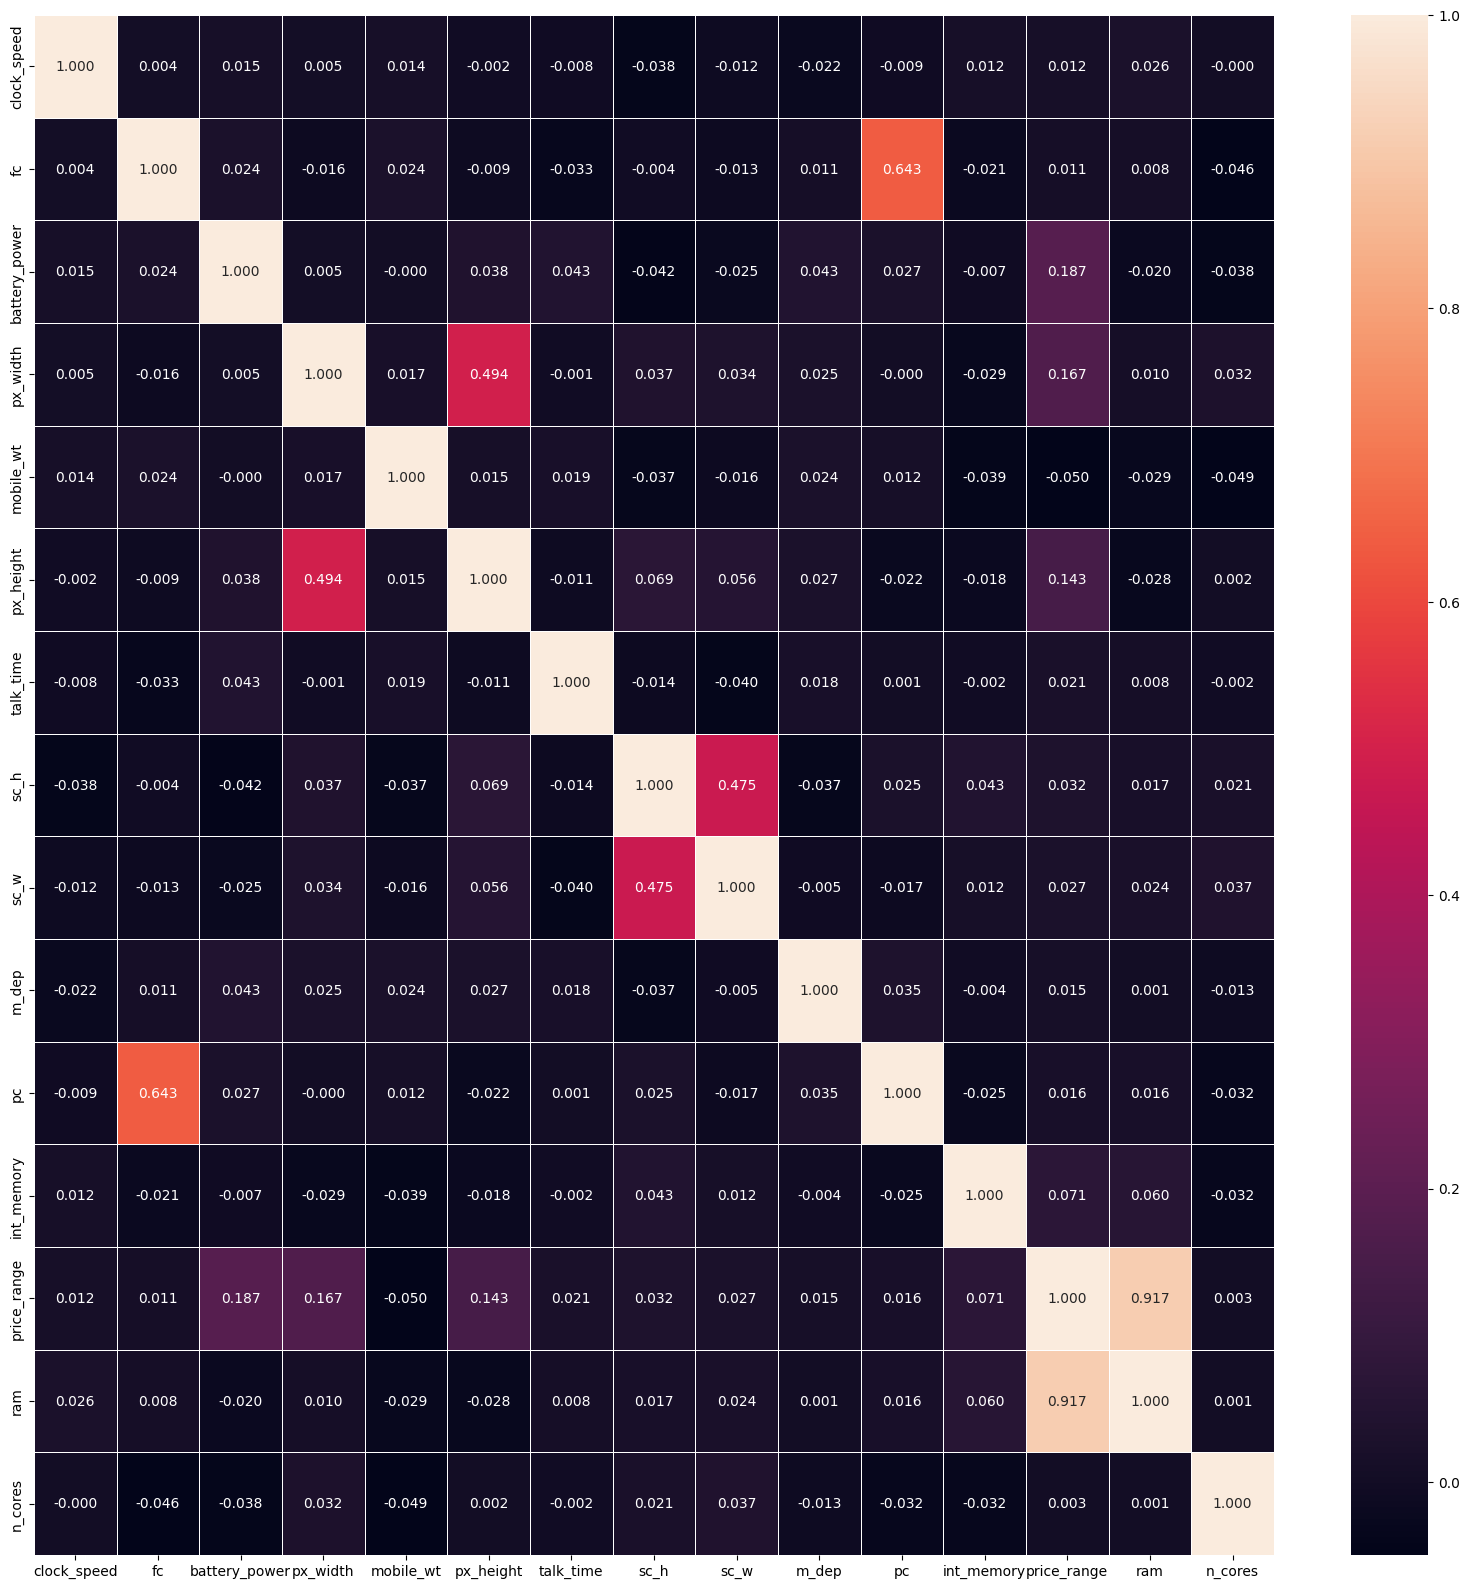

In [8]:
# correlation map
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat_features_list = list(set(train.columns) - set(columns_to_encode))

corr_mat = train[corr_mat_features_list].corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_mat, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.show

In [9]:
corr_mat.sort_values(by=["price_range"], ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917459
battery_power    0.186965
px_width         0.167494
px_height        0.143185
int_memory       0.070659
sc_h             0.032477
sc_w             0.027008
talk_time        0.020666
pc               0.016073
m_dep            0.014685
clock_speed      0.012198
fc               0.010966
n_cores          0.002691
mobile_wt       -0.049929
Name: price_range, dtype: float64

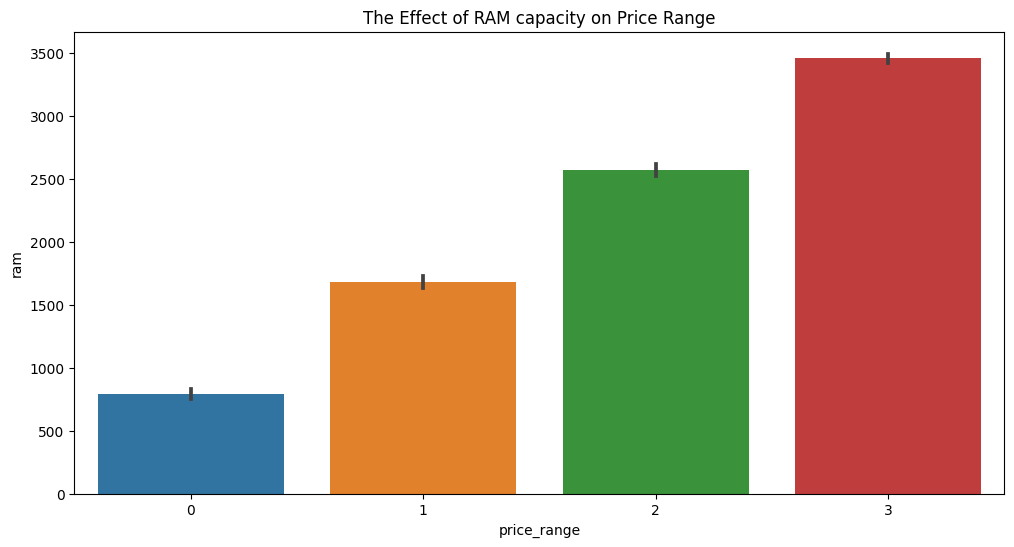

In [10]:
# how ram affects price_range
plt.figure(figsize=(12,6))
plt.title('The Effect of RAM capacity on Price Range')
sns.barplot(x = 'price_range',y = 'ram',data = train, )
plt.show()

**Checking outliers**

Outliers can markedly affect our models and can be a valuable source of information, providing us insights into specific behaviours.

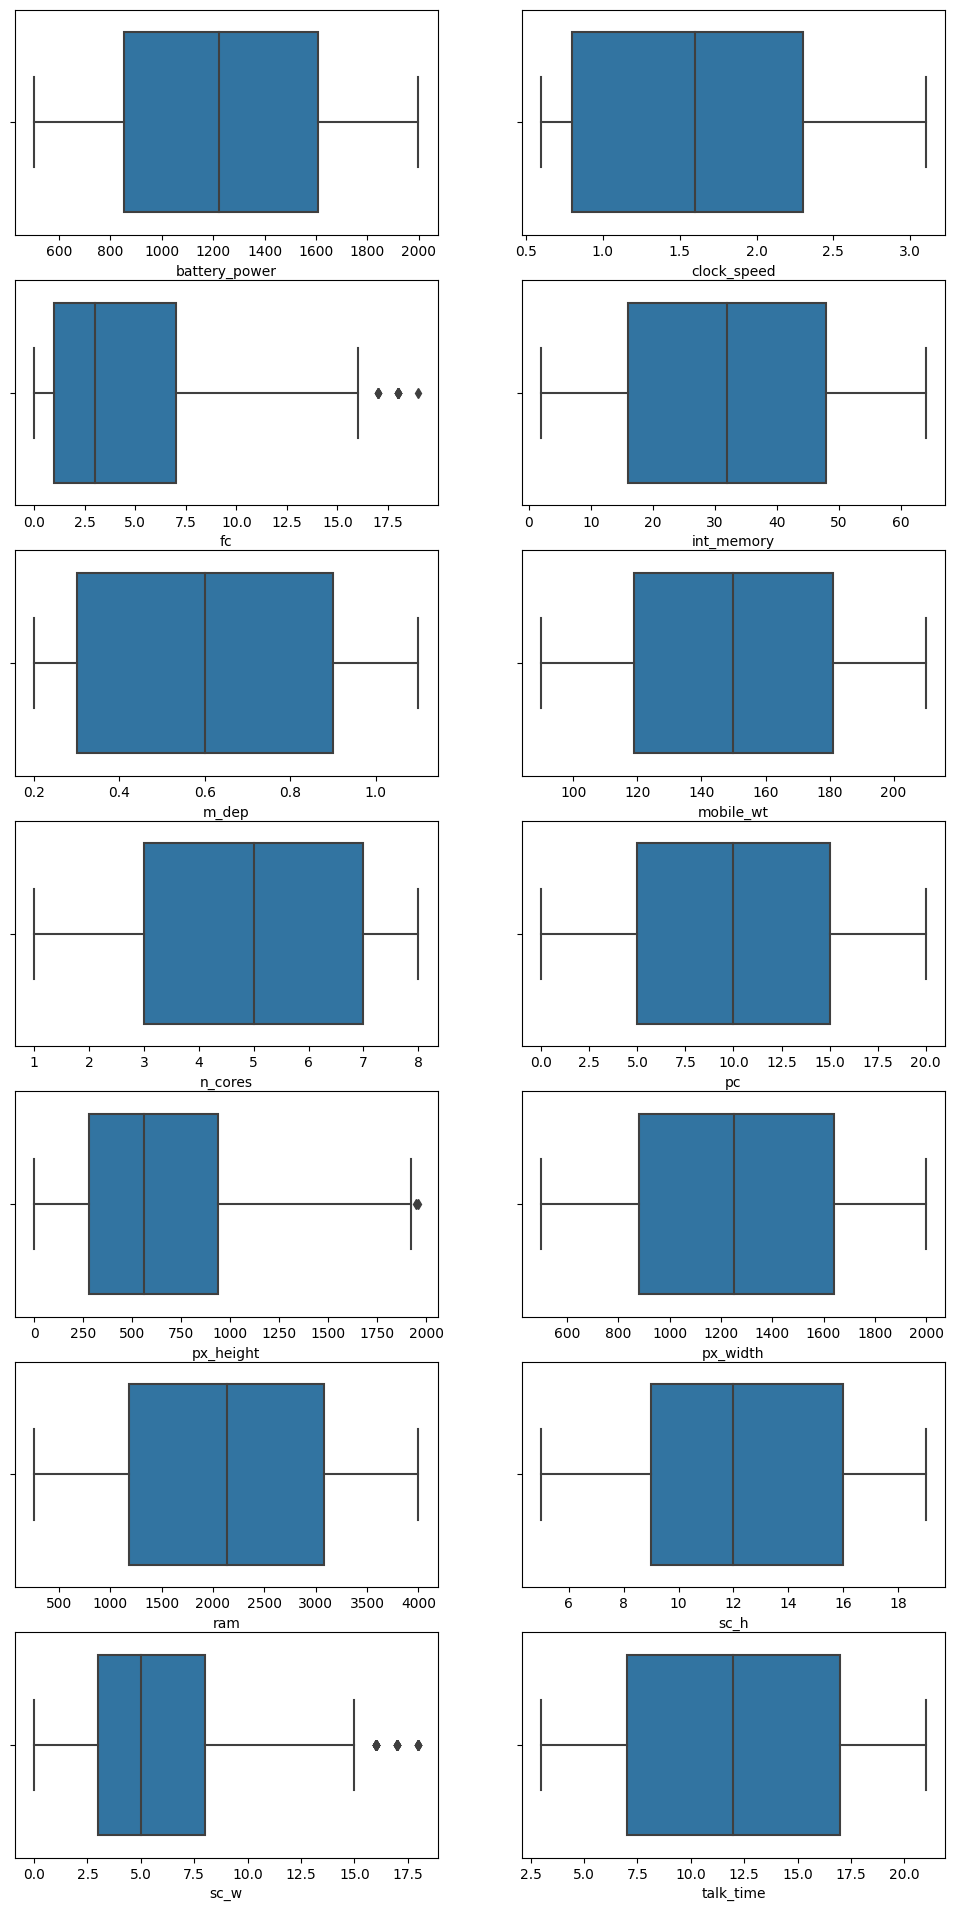

In [11]:
# outlier analysis of non-categorical data
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,24))

features_to_check_outliers = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for i, col in enumerate(features_to_check_outliers):
    sns.boxplot(x = train[f'{col}'], ax = ax[int(i % len(features_to_check_outliers) / 2) , i % 2])

There are a few outliers in **fc** and **px_height** only. If we were solving a regression problem, then we would need to pay special attention to outliers in the data.

**Standardization**

In [12]:
# feature scaling for continuous variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

numerical_features_list  = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

train[numerical_features_list] = sc.fit_transform(train[numerical_features_list])
test[numerical_features_list] = sc.fit_transform(test[numerical_features_list])
train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.490161,1,-1.271167,1,-0.989591,1,1.154872,0.684471,-0.122164,-0.679681,...,0.591555,1.692699,0.466675,1.108827,-0.660095,-0.736378,1,1,0,2
1,-1.533543,1,-1.271167,1,-0.531871,1,0.490835,1.373998,0.131756,0.186891,...,1.399607,1.064485,0.441012,-0.326445,-0.901522,-0.371533,1,1,0,2
2,-1.415080,1,1.219802,0,-0.989591,0,-1.224596,1.029234,-0.263230,0.620176,...,1.293522,1.226158,0.593158,0.869615,0.547036,-0.006689,1,0,0,2
3,1.332339,1,-0.399328,0,1.985591,1,0.656844,0.339707,0.018903,-1.112966,...,1.275465,-0.099558,-0.651505,-1.044080,-0.901522,0.723000,1,1,0,1
4,1.332339,0,0.223414,0,-0.074151,1,-1.224596,1.029234,-0.037524,1.486747,...,-0.591179,-0.547622,1.006518,0.151979,0.547036,1.270267,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.861496,0,0.846156,0,-0.760731,0,0.988863,-1.384111,-1.589254,-1.546252,...,-0.259382,0.371602,1.701257,1.108827,2.478445,-1.466067,1,1,0,3
1496,-1.007296,1,-1.271167,1,-0.989591,1,-1.667288,1.029234,-0.968562,0.620176,...,1.307065,1.466358,-1.332496,0.151979,-0.418669,1.452689,1,1,0,0
1497,1.660389,1,1.344350,1,-0.989591,0,0.380162,-1.039348,1.316714,-0.246395,...,0.614127,1.639578,-0.082333,-0.326445,1.029888,0.905423,1,1,1,2
1498,0.628398,0,-0.772974,0,-0.074151,1,0.767517,-1.384111,0.131756,0.186891,...,-0.692750,-1.351367,-1.148271,1.348039,1.029888,1.452689,1,1,1,0


**Splitting the training and testing dataset**


In [13]:
from sklearn.model_selection import train_test_split

# splitting of data
train_df = train.copy()

X = train_df.drop('price_range', axis=1)
y = train_df['price_range']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


**Building Model**

You will use the scikit-learn library to create your models. Scikit-learn is easily the most popular library for modelling data types typically stored in DataFrames.

The steps to building and using a model are:

Defining the type of model.
Fit: Capture patterns from provided data.
Predict: Predicting target value.
Evaluate: Determine how accurate the model's predictions are.
Below is an example of defining a KNeighbours Classifier model with scikit-learn and fitting it with the features and target variable.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# defining model
classifier = KNeighborsClassifier()

# fit the model
classifier.fit(X_train, y_train)

# predicting X_val
y_pred_knn = classifier.predict(X_val)

# evaluating
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69        76
           1       0.39      0.39      0.39        74
           2       0.52      0.48      0.50        73
           3       0.79      0.73      0.76        77

    accuracy                           0.59       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.59      0.59      0.59       300



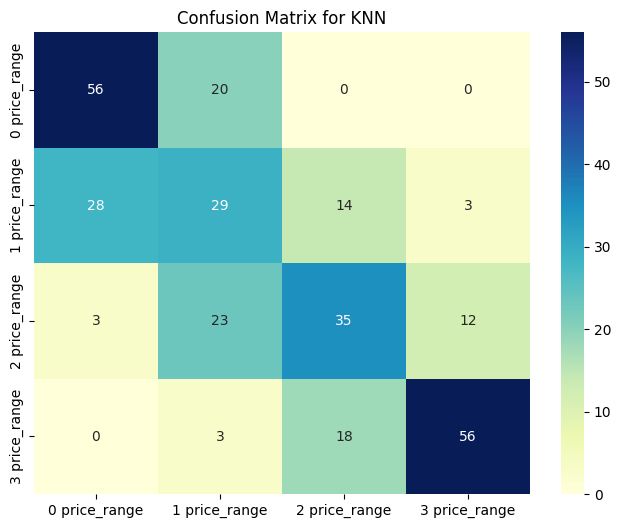

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

# visualizing the confusion matrix
cm = confusion_matrix(y_val, y_pred_knn)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data = cm, 
                         columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix for KNN")
plt.show()

As you can see, the classification accuracy is too poor. Let's try another classification model:



In [16]:
from sklearn.neural_network import MLPClassifier

# defining model
mlp = MLPClassifier(learning_rate_init=0.005, alpha=1e-3, tol=1e-1, 
                    early_stopping=True, validation_fraction=0.2, random_state=42)

# fit the model
mlp.fit(X_train,y_train)

# predicting X_val
y_pred_mlp = mlp.predict(X_val)

# evaluating
print(classification_report(y_val, y_pred_mlp))
accuracy = accuracy_score(y_val, y_pred_mlp)
print("Accuracy Score:", accuracy)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        76
           1       0.79      0.85      0.82        74
           2       0.88      0.78      0.83        73
           3       0.87      0.96      0.91        77

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Accuracy Score: 0.86


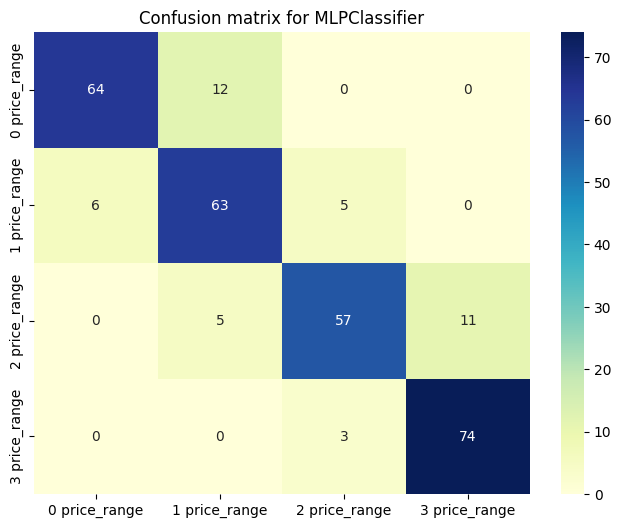

In [17]:
# visualizing the confusion matrix
cm = confusion_matrix(y_val, y_pred_mlp)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data = cm, 
                         columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion matrix for MLPClassifier")
plt.show()

The accuracy has improved, but it is still not the best result. Your task will be to find and choose the best model for the given dataset. Try to check the accuracy of the classifiers you are familiar with or try to improve the ones already mentioned.

**Using best trained algorithm**

In [18]:
# remove 'index' column
test_df = test.copy()
test_df = test_df.drop('index', axis=1)

In [19]:
# prediction on the test set
predicted_price_range = mlp.predict(test_df)
predicted_price_range

array([1, 3, 3, 0, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 2, 1, 1, 0,
       0, 3, 2, 2, 3, 3, 2, 1, 0, 1, 0, 1, 3, 3, 0, 2, 1, 1, 2, 3, 1, 1,
       1, 0, 0, 2, 2, 0, 3, 2, 2, 0, 0, 2, 0, 0, 2, 3, 1, 0, 2, 1, 3, 2,
       0, 2, 3, 1, 3, 1, 0, 3, 1, 2, 0, 1, 0, 0, 0, 0, 3, 2, 1, 1, 2, 0,
       0, 2, 2, 2, 1, 2, 3, 0, 0, 1, 0, 3, 1, 2, 3, 3, 1, 1, 3, 2, 3, 3,
       2, 3, 3, 2, 3, 3, 3, 1, 0, 3, 2, 1, 3, 0, 0, 1, 2, 2, 3, 1, 3, 0,
       3, 0, 0, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 2, 0, 0, 1, 1, 3, 1, 0,
       3, 3, 3, 0, 0, 1, 2, 0, 1, 3, 1, 1, 0, 0, 1, 0, 1, 3, 0, 1, 3, 1,
       2, 0, 2, 2, 2, 2, 1, 0, 3, 3, 0, 1, 1, 1, 2, 1, 3, 3, 0, 3, 1, 2,
       3, 1, 0, 1, 0, 3, 2, 3, 1, 3, 3, 2, 2, 2, 3, 1, 1, 0, 0, 0, 2, 1,
       0, 1, 0, 2, 3, 0, 3, 1, 2, 1, 0, 3, 3, 2, 2, 2, 2, 3, 1, 0, 0, 2,
       3, 2, 2, 1, 1, 3, 3, 3, 0, 1, 2, 2, 0, 2, 3, 0, 3, 0, 3, 0, 1, 0,
       1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 1,
       1, 2, 2, 3, 3, 2, 3, 3, 1, 2, 2, 1, 2, 1, 1,